##  Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

In [2]:
using StaticArrays

In [3]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [4]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k = 0.0;
el_link = 0.0

condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
condition2 = SA[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k, el_link]


p = [a, b, c, d, s, xr, r, I, xv, k, el_link]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )
ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );
ds_HR1

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0, 0.0]

In [5]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0, 0.0]

In [6]:
ds = ds_HR1

pvalues = range(-0.5, stop = 0.5, length = 500)
i = 1
plane = (2, 0.0)
tf = 1000.0
tr = 1000.0
p_index = 10

10

In [7]:
output = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = -0.5
parameter = -0.49799599198396793
parameter = -0.49599198396793587
parameter = -0.4939879759519038
parameter = -0.49198396793587174
parameter = -0.48997995991983967
parameter = -0.4879759519038076
parameter = -0.48597194388777554
parameter = -0.48396793587174347
parameter = -0.4819639278557114
parameter = -0.47995991983967934
parameter = -0.4779559118236473
parameter = -0.4759519038076152
parameter = -0.47394789579158314
parameter = -0.47194388777555113
parameter = -0.46993987975951906
parameter = -0.467935871743487
parameter = -0.46593186372745493
parameter = -0.46392785571142287
parameter = -0.4619238476953908
parameter = -0.45991983967935873
parameter = -0.45791583166332667
parameter = -0.4559118236472946
parameter = -0.45390781563126253
parameter = -0.45190380761523047
parameter = -0.4498997995991984
parameter = -0.44789579158316634
parameter = -0.44589178356713427
parameter = -0.4438877755511022
parameter = -0.44188376753507014
parameter = -0.43987975951903807
para

parameter = 0.009018036072144289
parameter = 0.011022044088176353
parameter = 0.013026052104208416
parameter = 0.01503006012024048
parameter = 0.017034068136272545
parameter = 0.01903807615230461
parameter = 0.021042084168336674
parameter = 0.023046092184368736
parameter = 0.025050100200400802
parameter = 0.027054108216432865
parameter = 0.02905811623246493
parameter = 0.031062124248496994
parameter = 0.033066132264529056
parameter = 0.03507014028056112
parameter = 0.03707414829659319
parameter = 0.03907815631262525
parameter = 0.041082164328657314
parameter = 0.04308617234468938
parameter = 0.045090180360721446
parameter = 0.047094188376753505
parameter = 0.04909819639278557
parameter = 0.05110220440881764
parameter = 0.0531062124248497
parameter = 0.05511022044088176
parameter = 0.05711422845691383
parameter = 0.05911823647294589
parameter = 0.061122244488977955
parameter = 0.06312625250501001
parameter = 0.06513026052104208
parameter = 0.06713426853707415
parameter = 0.0691382765531

In [8]:
ds = ds_HR1

pvalues = range(-0.5, stop = 0.5, length = 500)
i = 4
plane = (2, 0.0)
tf = 1000.0
tr = 1000.0
p_index = 10

output1 = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = -0.5
parameter = -0.49799599198396793
parameter = -0.49599198396793587
parameter = -0.4939879759519038
parameter = -0.49198396793587174
parameter = -0.48997995991983967
parameter = -0.4879759519038076
parameter = -0.48597194388777554
parameter = -0.48396793587174347
parameter = -0.4819639278557114
parameter = -0.47995991983967934
parameter = -0.4779559118236473
parameter = -0.4759519038076152
parameter = -0.47394789579158314
parameter = -0.47194388777555113
parameter = -0.46993987975951906
parameter = -0.467935871743487
parameter = -0.46593186372745493
parameter = -0.46392785571142287
parameter = -0.4619238476953908
parameter = -0.45991983967935873
parameter = -0.45791583166332667
parameter = -0.4559118236472946
parameter = -0.45390781563126253
parameter = -0.45190380761523047
parameter = -0.4498997995991984
parameter = -0.44789579158316634
parameter = -0.44589178356713427
parameter = -0.4438877755511022
parameter = -0.44188376753507014
parameter = -0.43987975951903807
para

parameter = 0.003006012024048096
parameter = 0.00501002004008016
parameter = 0.0070140280561122245
parameter = 0.009018036072144289
parameter = 0.011022044088176353
parameter = 0.013026052104208416
parameter = 0.01503006012024048
parameter = 0.017034068136272545
parameter = 0.01903807615230461
parameter = 0.021042084168336674
parameter = 0.023046092184368736
parameter = 0.025050100200400802
parameter = 0.027054108216432865
parameter = 0.02905811623246493
parameter = 0.031062124248496994
parameter = 0.033066132264529056
parameter = 0.03507014028056112
parameter = 0.03707414829659319
parameter = 0.03907815631262525
parameter = 0.041082164328657314
parameter = 0.04308617234468938
parameter = 0.045090180360721446
parameter = 0.047094188376753505
parameter = 0.04909819639278557
parameter = 0.05110220440881764
parameter = 0.0531062124248497
parameter = 0.05511022044088176
parameter = 0.05711422845691383
parameter = 0.05911823647294589
parameter = 0.061122244488977955
parameter = 0.0631262525

In [9]:
output_summ = output + output1;

In [13]:
pwd()

"C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\attractors\\notebook\\orbit"

In [21]:
cd("C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\attractors\\result\\files")
directory = pwd()
filename = "\\orbit_dia_k1=k2.jld"
path = directory*filename

"C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\attractors\\result\\files\\orbit_dia_k1=k2.jld"

In [22]:
save(path, "data", output_summ)

In [10]:
ticks = range(-0.5, 0.5, length = 6)
yticks = [-2, -1, 0, 1, 2]

5-element Vector{Int64}:
 -2
 -1
  0
  1
  2

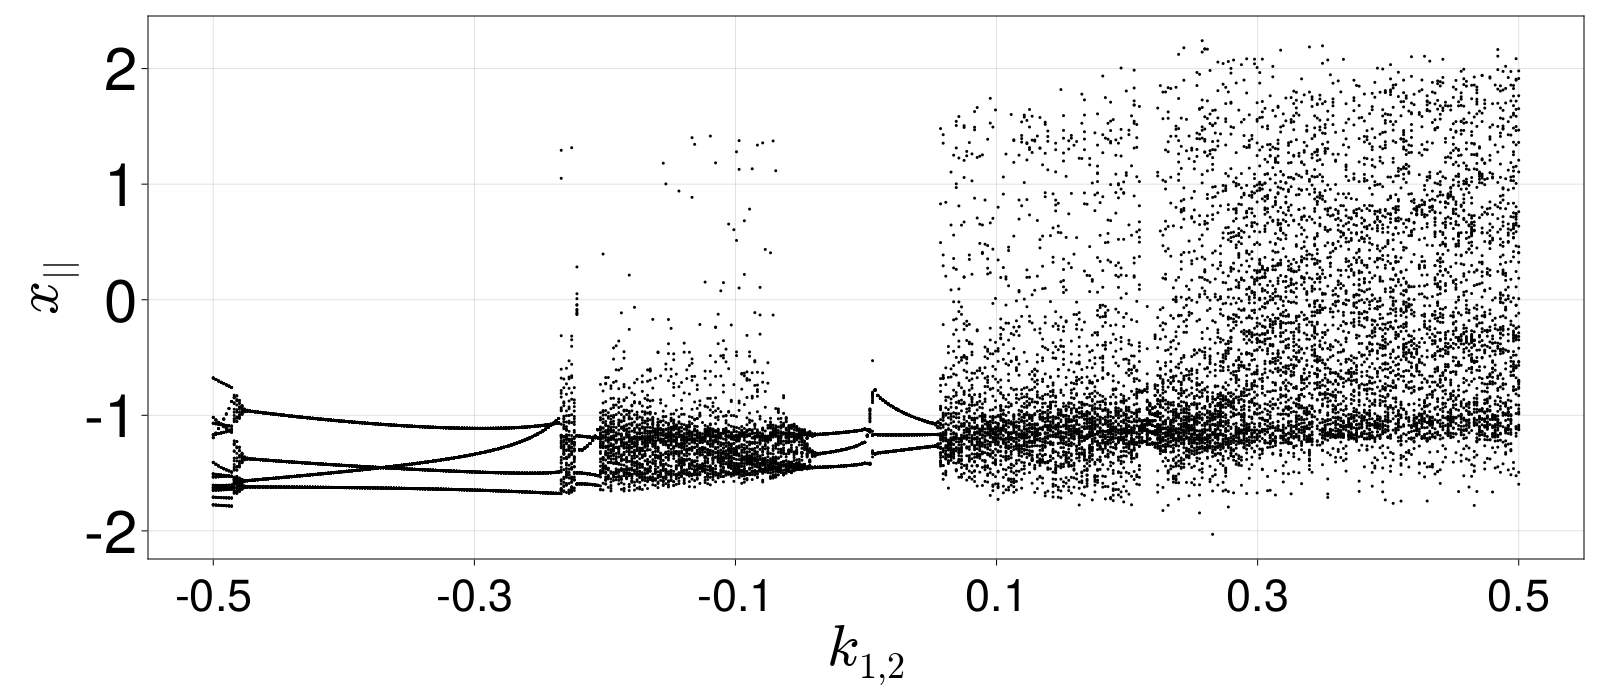

In [12]:
f = Figure(resolution = (1600, 700), fontsize = 20)


ax = Axis(f[1, 1], xlabel = L"k_{1,2}", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
                xticklabelsize = 45, yticklabelsize = 60, xticks = ticks, yticks = yticks  )


for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 3.0
    )
    
end

f